## Import libraries

In [54]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
import matplotlib.pyplot as plt 
import seaborn as sns

## Loading Datasets

In [27]:
# Step 2: Load data from CSV
data = pd.read_csv('resources/Crop_recommendation.csv')  # Replace with your actual file path

# Display first few rows of the dataset
data.head()


,N,P,K,temperature,humidity,ph,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,rice
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,rice
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,rice


## Preprocessing the Data

In [28]:
# Step 3: Preprocess the data
X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph']].values  # Features
y = data['label'].values  # Target (crop label)

# Encode the 'label' (crop names) to numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Convert crop names to integers

# Display unique labels
print("Unique crop labels:", label_encoder.classes_)


Unique crop labels: ['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'corn'
 'cotton' 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango'
 'mothbeans' 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas'
 'pineapple' 'pomegranate' 'rice' 'sugarcane' 'watermelon']


## Splitting the Data

In [29]:
# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training and Testing data split completed.")


Training and Testing data split completed.


## Building Nueral Network

In [30]:
# Step 5: Build a neural network model with TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),  # Input layer
    tf.keras.layers.Dense(128, activation='relu'),  # Hidden layer 1
    tf.keras.layers.Dense(64, activation='relu'),   # Hidden layer 2
    tf.keras.layers.Dense(len(np.unique(y)), activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("Model built and compiled.")


E:\3rdYear\CAPSTONE\Crop_recommendation\env\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model built and compiled.


## Training the Model

In [31]:
# Step 6: Train the model
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2, batch_size=16)
print("Model training completed.")


Epoch 1/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.1698 - loss: 7.1916 - val_accuracy: 0.4703 - val_loss: 1.6423
Epoch 2/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5346 - loss: 1.3430 - val_accuracy: 0.6317 - val_loss: 1.0140
Epoch 3/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6684 - loss: 0.9612 - val_accuracy: 0.6657 - val_loss: 1.1647
Epoch 4/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7148 - loss: 0.9743 - val_accuracy: 0.6742 - val_loss: 0.8856
Epoch 5/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7314 - loss: 0.7203 - val_accuracy: 0.7110 - val_loss: 0.7066
Epoch 6/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7717 - loss: 0.6113 - val_accuracy: 0.7394 - val_loss: 0.7002
Epoch 7/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7615 - loss: 0.6323 - val_accuracy: 0.7790 - val_loss: 0.5197
Epoch 8/30
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7842 - loss: 0.5515 - val_accuracy: 0.7705 - val_loss:

## Evaluating the model

In [32]:
# Step 7: Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8404 - loss: 0.3881
Test Accuracy: 83.86%


## Making Predictions

In [33]:
# Step 8: Make predictions with new soil data
new_soil = np.array([[84,57,25,22.53510514,67.99257471,6.489040367]])  # Example input
predicted_crop_idx = np.argmax(model.predict(new_soil), axis=-1)
predicted_crop = label_encoder.inverse_transform(predicted_crop_idx)
print(f"The suggested crop for the given conditions is: {predicted_crop[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
The suggested crop for the given conditions is: maize


## Saving and Loading the Model

In [34]:
# Step 9: Save the model
model.save('crop_recommendation_model.h5')
print("Model saved.")

# Step 10: Load the saved model
loaded_model = tf.keras.models.load_model('crop_recommendation_model.h5')
print("Model loaded.")

Model saved.
Model loaded.


## Re-evaluating the Loaded Model

In [35]:
# Step 11: Evaluate the loaded model
loaded_test_loss, loaded_test_acc = loaded_model.evaluate(X_test, y_test)
print(f"Loaded Model Test Accuracy: {loaded_test_acc * 100:.2f}%")

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8404 - loss: 0.3881
Loaded Model Test Accuracy: 83.86%


## Analyzing Training History

In [36]:
# Step 12: Create a DataFrame for training history
history_df = pd.DataFrame({
    'Epoch': range(1, len(history.history['loss']) + 1),
    'Training Loss': history.history['loss'],
    'Validation Loss': history.history['val_loss'],
    'Training Accuracy': history.history['accuracy'],
    'Validation Accuracy': history.history['val_accuracy']
})

# Display the DataFrame
history_df.head()

,Epoch,Training Loss,Validation Loss,Training Accuracy,Validation Accuracy
0,1,3.864325,1.642330,0.296244,0.470255
1,2,1.162802,1.013985,0.584692,0.631728
2,3,0.914065,1.164682,0.675408,0.665722
3,4,0.928438,0.885616,0.695960,0.674221
4,5,0.712616,0.706642,0.736357,0.711048


## Plotting Accuracy and Loss

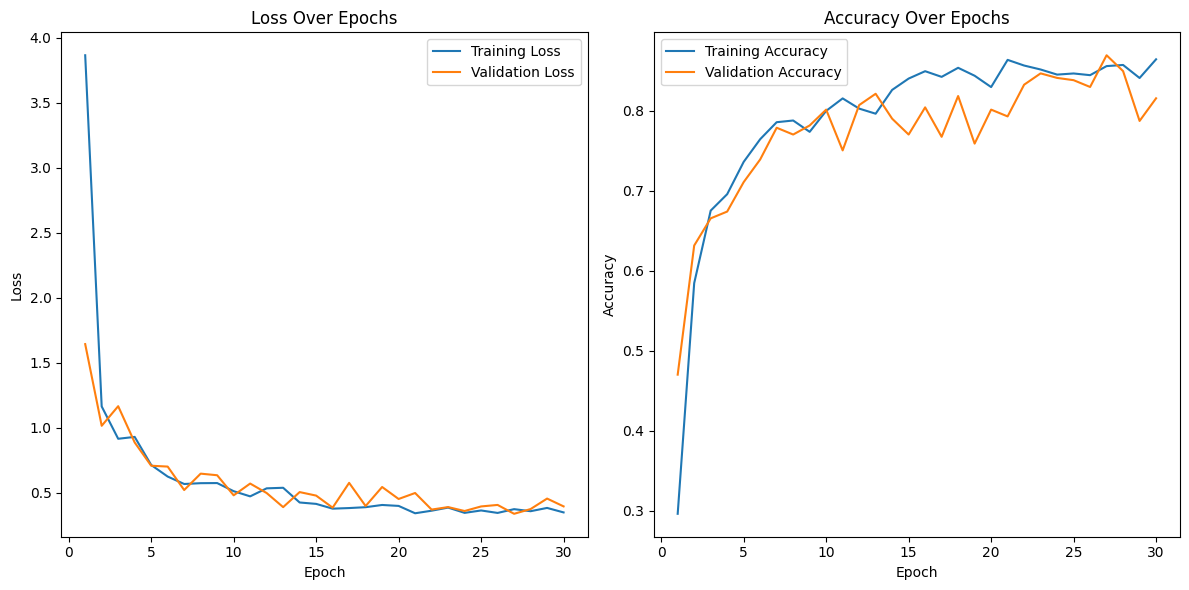

In [37]:
# Step 13: Plot training and validation loss and accuracy
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history_df['Epoch'], history_df['Training Loss'], label='Training Loss')
plt.plot(history_df['Epoch'], history_df['Validation Loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history_df['Epoch'], history_df['Training Accuracy'], label='Training Accuracy')
plt.plot(history_df['Epoch'], history_df['Validation Accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


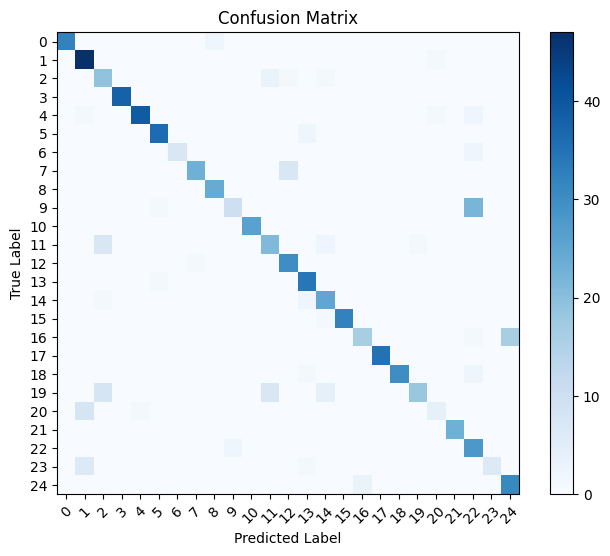

In [45]:

# Assuming model.predict(X_test) returns probabilities (for multi-class classification)
y_pred = model.predict(X_test)

# Convert probabilities to class labels by choosing the class with the highest probability
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(len(cm)), np.unique(y_test), rotation=45)
plt.yticks(np.arange(len(cm)), np.unique(y_test))
plt.show()

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


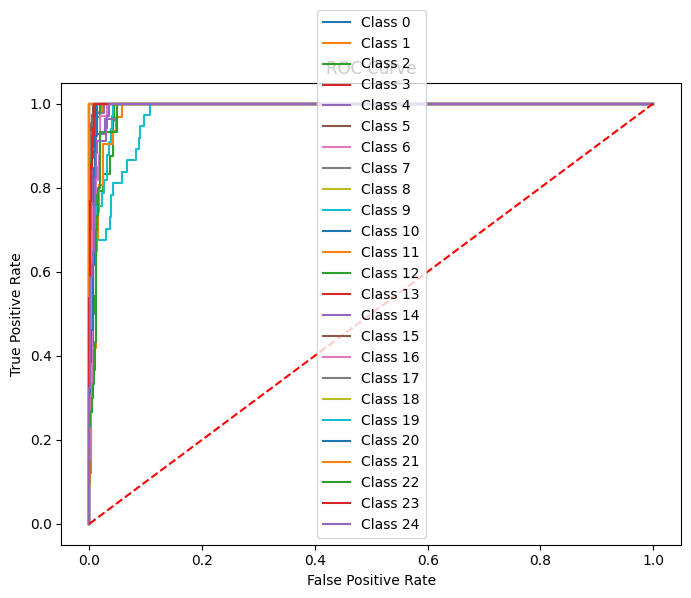

In [49]:

# Get predicted probabilities (this is for multi-class classification)
y_prob = model.predict(X_test)

# Initialize figure
plt.figure(figsize=(8, 6))

# For each class, compute the ROC curve
for i in range(y_prob.shape[1]):  # Loop through each class
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])  # One-vs-rest approach
    plt.plot(fpr, tpr, label=f'Class {i}')

# Plot diagonal (no skill line)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
24

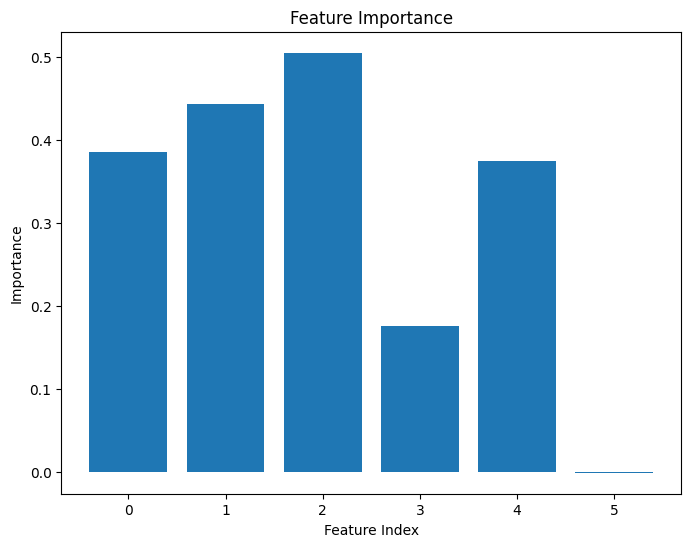

In [55]:

# Define a custom scoring function for Keras model
def keras_score(model, X, y):
    # Predict probabilities
    y_pred = model.predict(X)

    # For binary classification (sigmoid output)
    if y_pred.shape[1] == 1:
        y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary class labels
    else:
        # For multi-class classification (softmax output)
        y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

    # Calculate accuracy
    accuracy = np.mean(y_pred == y)  # Ensure y_pred and y have the same shape
    return accuracy

# Assuming `model` is your trained Keras model and `X_test` and `y_test` are your test data and labels
# Now, calculate permutation importance with the custom scoring function
result = permutation_importance(
    model, X_test, y_test,
    n_repeats=10, random_state=42,
    scoring=keras_score  # Use the custom scoring function
)

# Get the importance of each feature
importances = result.importances_mean

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(range(len(importances)), importances)
plt.title('Feature Importance')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.show()